In [1]:
import pandas as pd
import numpy as np

# 读取数据
pbmc_data = pd.read_csv('pbmc_data.csv')
# 随机展示10行
print(pbmc_data.sample(n=100))

            Unnamed: 0   TNFRSF4    CPSF3L    ATAD3C   C1orf86      RER1  \
1079  CCGCGAGAGGTTCA-1 -0.236536 -0.259242 -0.048396 -0.431352  1.983010   
1702  GCCCAACTATGGTC-1 -0.241246 -0.253826 -0.048266 -0.419564 -0.452213   
676   ATGAAACTCTGTGA-1 -0.360265 -0.298385 -0.056943  1.539321  1.303163   
953   CATCAGGATAGCCA-1 -0.226241 -0.242196 -0.046777  2.580373  2.357878   
680   ATGAAGGACCTTAT-1 -0.151420 -0.222674 -0.041881  3.358993 -0.334113   
...                ...       ...       ...       ...       ...       ...   
1364  CTCTAAACGGCGAA-1 -0.257364 -0.259248 -0.049401 -0.432775 -0.472802   
418   AGAGTGCTGTCCTC-1 -0.225327 -0.259139 -0.047848 -0.430363 -0.470132   
1529  GACGTATGTTTGCT-1 -0.326302 -0.270276 -0.053453 -0.462091 -0.517249   
406   AGACTGACCCTTTA-1 -0.217342 -0.296516 -0.049924 -0.513378 -0.603600   
2169  TAGGCATGGCGAGA-1 -0.318919 -0.270494 -0.053111  1.933848 -0.517504   

      TNFRSF25   TNFRSF9  CTNNBIP1       SRM  ...     BACE2      SIK1  \
1079  3.955072

## 数据说明：注：以下的内容主要来自生科院同学+Deepseek-R1+Wiki百科的解释
我们需要处理的应该是RNA测序的数据
第一列数据表示barcode,代表一个细胞
其他列都是基因的名称，数值代表表达量。
最后两列是cell type，数值编号和名称。

## 研究背景：
单细胞测序技术的突破（如10x Genomics、Smart-seq2）使得在单个细胞水平解析基因表达成为可能。传统Bulk RNA测序仅能提供细胞群体的平均表达谱，掩盖了细胞异质性，而单细胞技术揭示了外周血中免疫细胞的多样性。外周血作为免疫系统的主要载体，包含T细胞、B细胞、自然杀伤细胞（NK）、单核细胞等多种免疫亚群，其动态变化与感染、癌症、自身免疫疾病等密切相关。

## 外周血研究的核心价值
免疫细胞异质性解析：例如，CD8+ T细胞可进一步分为效应T细胞、记忆T细胞和耗竭T细胞，单细胞测序能精准区分这些亚群并揭示其功能状态。

疾病机制探索：在癌症中，外周血循环肿瘤细胞（CTCs）和免疫细胞组成可反映肿瘤微环境的状态；在COVID-19中，单细胞数据揭示了重症患者中单核细胞的过度炎症反应。

生物标志物发现：通过对比健康人与患者的细胞亚群比例或差异基因，可筛选潜在诊断标志物或治疗靶点（如PD-1在耗竭T细胞中的高表达）。

## 医学应用场景
肿瘤免疫治疗：分析患者外周血中免疫细胞的功能状态，预测PD-1/PD-L1抑制剂疗效。

自身免疫疾病：系统性红斑狼疮（SLE）患者外周血中浆细胞样树突状细胞（pDC）的异常活化提示I型干扰素信号通路的激活。

感染性疾病：HIV感染中CD4+ T细胞的耗竭轨迹可通过单细胞轨迹分析（如Monocle）重建。



## RNA测序的发展历史：
RNA测序技术自20世纪70年代起经历了多代技术革新，其发展历程可分为以下三个阶段：

1. 第一代测序技术：Sanger测序（1975-2005）
基于链终止法（双脱氧法），通过荧光标记ddNTP终止DNA链延伸，结合毛细管电泳读取序列。其特点是准确性高（误差率<0.1%），但通量低、成本高，主要用于少量RNA转录本的验证，如单个基因的剪接变体分析。

2. 第二代测序技术（NGS，2005-2015）
以Illumina、Ion Torrent为代表的高通量测序技术，通过边合成边测序（SBS）实现大规模平行测序。NGS的核心优势在于通量高、成本低，能够同时分析全转录组，支持差异基因表达、可变剪接、融合基因等研究。例如，Ion Torrent平台支持靶向转录组测序，可检测超过20,000个基因的表达。

3. 第三代测序技术（单分子测序，2015至今）
以PacBio和Oxford Nanopore为代表，无需PCR扩增，直接对RNA或cDNA进行长读长测序。Oxford Nanopore的直接RNA测序技术可捕获全长转录本，同时检测RNA修饰（如m6A），解决了短读长技术无法解析复杂剪接异构体和表观修饰的难题。此外，单细胞RNA测序（如10x Genomics、Takara的Shasta系统）实现了单细胞分辨率的转录组分析，揭示细胞异质性。

## RNA测序的实现方法
RNA测序的流程通常包括以下关键步骤：

1. 样本制备与文库构建
RNA提取与富集：从组织或细胞中提取总RNA，通过poly-A捕获富集mRNA或保留非编码RNA（如lncRNA、miRNA）。

cDNA合成与建库：将RNA反转录为cDNA，添加测序接头和条形码（Barcode）。例如，Takara的Shasta单细胞系统通过微孔芯片实现单细胞分选与文库构建，每个孔可容纳单个细胞并添加特异性条形码，支持高通量单细胞测序。

2. 测序技术选择
短读长测序（NGS）：适用于基因表达定量和剪接分析，如Illumina平台生成150-300 bp读长数据。

长读长测序（三代测序）：如Oxford Nanopore直接测序RNA分子，读长可达数万碱基，用于解析全长转录本和RNA修饰。

3. 数据分析
比对与定量：使用STAR、Kallisto等工具将测序reads比对到参考基因组，统计基因或转录本表达量（如TPM、FPKM）。

差异表达与功能分析：通过DESeq2、edgeR等工具鉴定差异基因，结合GO/KEGG通路富集分析功能。

高级应用：单细胞数据分析（如UMAP降维、细胞聚类）、融合基因检测（如STAR-Fusion）等。

## RNA测序的具体功能
1. 基因表达定量与差异分析
RNA-Seq可精确量化基因表达水平，比较不同条件（如疾病vs健康）下的差异表达基因。例如，肿瘤组织中EGFR mRNA的高表达可通过RNA-Seq检测，并用于癌症分型。

2. 转录本结构与剪接分析
可变剪接：鉴定同一基因的不同剪接异构体，如癌症中常见的异常剪接事件。

新转录本发现：长读长测序揭示未注释的转录本，如lncRNA或融合基因（如BCR-ABL1）。

3. 表观转录组学研究
直接RNA测序技术（如Oxford Nanopore）可检测RNA修饰（如m6A、假尿苷酸），揭示其在基因调控和疾病中的作用。例如，m6A修饰在神经退行性疾病中的异常分布。

4. 单细胞分辨率研究
单细胞RNA测序（scRNA-seq）解析细胞异质性，如外周血中T细胞亚群（效应T细胞、记忆T细胞）的功能差异，或肿瘤微环境中免疫细胞的动态变化。





In [2]:
print(f"数据大小:{pbmc_data.shape}")
print(f"列索引如下:")
print(pbmc_data.columns)
print("细胞类型编码与名称的对应关系:")
cell_types = dict(zip(pbmc_data['cell_type'], pbmc_data['cell_type_string']))
for code, name in cell_types.items():
    print(f"{code}: {name}")


数据大小:(2638, 1841)
列索引如下:
Index(['Unnamed: 0', 'TNFRSF4', 'CPSF3L', 'ATAD3C', 'C1orf86', 'RER1',
       'TNFRSF25', 'TNFRSF9', 'CTNNBIP1', 'SRM',
       ...
       'BACE2', 'SIK1', 'C21orf33', 'ICOSLG', 'SUMO3', 'SLC19A1', 'S100B',
       'PRMT2', 'cell_type', 'cell_type_string'],
      dtype='object', length=1841)
细胞类型编码与名称的对应关系:
0: CD4 T
2: B
1: CD14 Monocytes
4: NK
3: CD8 T
5: FCGR3A Monocytes
6: Dendritic
7: Megakaryocytes


看了下，有2638个细胞数据

每个细胞有1838个基因对应的表达量

并且一共有8种细胞，分别对应0~7的数字编码。



In [2]:
#搭建网络框架 这里采取带有batchnorm 和残差连接的 DNN

import torch
import torch.nn as nn
import torch.nn.functional as F

class DeepClassifier(nn.Module):
    def __init__(self, input_dim=1838, hidden_dims=[512, 256, 128], output_dim=8):
        super().__init__()
        self.layers = nn.ModuleList()
        
        # 输入层
        self.input_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.BatchNorm1d(hidden_dims[0]),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        # 隐藏层（带残差连接）
        for i in range(len(hidden_dims)-1):
            self.layers.append(
                ResidualBlock(hidden_dims[i], hidden_dims[i+1])
            )
            
        # 输出层
        self.output_layer = nn.Linear(hidden_dims[-1], output_dim)
        
    def forward(self, x):
        x = self.input_layer(x)
        for layer in self.layers:
            x = layer(x)
        return self.output_layer(x)

class ResidualBlock(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.fc1 = nn.Linear(in_dim, out_dim)
        self.bn1 = nn.BatchNorm1d(out_dim)
        self.fc2 = nn.Linear(out_dim, out_dim)
        self.bn2 = nn.BatchNorm1d(out_dim)
        self.dropout = nn.Dropout(0.3)
        
        # 如果输入输出维度不同，添加一个线性映射
        self.shortcut = nn.Linear(in_dim, out_dim) if in_dim != out_dim else nn.Identity()
        
    def forward(self, x):
        identity = self.shortcut(x)
        
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.bn2(self.fc2(x))
        
        x += identity
        x = F.relu(x)
        return x

In [21]:
#训练器
def train_classifier(model, train_loader, val_loader, num_epochs=100):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # 使用Adam优化器:0.001学习率，1e-4的L2正则项
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    # 学习率调度器
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        mode='min', 
        factor=0.5, #学习率调整因子，如果损失不下降就将学习率减半
        patience=5, #容忍5个epoch验证损失不下降
        verbose=True #打印学习率变化信息
    )
    
    # 损失函数：采用交叉熵
    criterion = nn.CrossEntropyLoss()# 注意这里用了交叉熵之后原网络中输出就不需要加softmax层了
    
    
    for epoch in range(num_epochs):
        # 训练阶段
        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            
        # 验证阶段
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
                
                _, predicted = outputs.max(1)
                total += batch_y.size(0)
                correct += predicted.eq(batch_y).sum().item()
        
        val_acc = 100. * correct / total #准确率
        val_loss = val_loss / len(val_loader)
        
        # 更新学习率
        scheduler.step(val_loss)
        
            
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

In [3]:
#数据预处理
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
def pre_process(data,batch_size=32):
    #分离特征和标签
    X = data.iloc[:,1:1839].values
    Y = data.iloc[:, 1839].values.astype(np.int64)

    #标准化
    scaler = StandardScaler()
    X = scaler.fit_transform(X) #标准化为均值0，方差1的数据分布

    #划分training_set validation set
    X_train, X_val, y_train, y_val = train_test_split(
        X, Y, 
        test_size=0.2, #验证集占0.2
        random_state=42, 
        stratify=Y
    )
    # 转换为张量
    X_train = torch.FloatTensor(X_train)
    y_train = torch.LongTensor(y_train)
    X_val = torch.FloatTensor(X_val)
    y_val = torch.LongTensor(y_val)

    # 创建数据加载器
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    return train_loader, val_loader


In [23]:
#首次训练 baseline
train_loader, val_loader = pre_process(pbmc_data,batch_size=32)
model = DeepClassifier(
    input_dim=1838,
    hidden_dims=[512,256,128,64],
    output_dim=8
)
# 2. 记录开始时间
import time
start_time = time.time()

# 3. 训练模型
print("开始训练...")
# 2. 调用训练器进行训练
train_classifier(
    model=model,
    train_loader=train_loader,  # 之前预处理得到的训练数据加载器
    val_loader=val_loader,      # 之前预处理得到的验证数据加载器
    num_epochs=500              # 训练轮数
)
# 4. 打印训练时间
training_time = time.time() - start_time
print(f'\n训练完成')
print(f'总训练时间: {training_time:.2f} 秒')

# 5. 在验证集上进行最终评估
model.eval()
correct = 0
total = 0
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = outputs.max(1)
        total += batch_y.size(0)
        correct += predicted.eq(batch_y).sum().item()

final_acc = 100. * correct / total
print(f'最终验证集准确率: {final_acc:.2f}%')

开始训练...


d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.3694, Val Acc: 85.98%
Epoch 2/500:
Val Loss: 0.3238, Val Acc: 89.96%
Epoch 3/500:
Val Loss: 0.3220, Val Acc: 92.99%
Epoch 4/500:
Val Loss: 0.3398, Val Acc: 91.86%
Epoch 5/500:
Val Loss: 0.3706, Val Acc: 93.18%
Epoch 6/500:
Val Loss: 0.3760, Val Acc: 93.18%
Epoch 7/500:
Val Loss: 0.3329, Val Acc: 93.37%
Epoch 8/500:
Val Loss: 0.3593, Val Acc: 94.13%
Epoch 9/500:
Val Loss: 0.3991, Val Acc: 93.94%
Epoch 10/500:
Val Loss: 0.3686, Val Acc: 93.75%
Epoch 11/500:
Val Loss: 0.3606, Val Acc: 93.94%
Epoch 12/500:
Val Loss: 0.3966, Val Acc: 93.75%
Epoch 13/500:
Val Loss: 0.3951, Val Acc: 93.37%
Epoch 14/500:
Val Loss: 0.3823, Val Acc: 94.51%
Epoch 15/500:
Val Loss: 0.3903, Val Acc: 93.94%
Epoch 16/500:
Val Loss: 0.3966, Val Acc: 94.51%
Epoch 17/500:
Val Loss: 0.4235, Val Acc: 93.94%
Epoch 18/500:
Val Loss: 0.3944, Val Acc: 94.70%
Epoch 19/500:
Val Loss: 0.4232, Val Acc: 93.75%
Epoch 20/500:
Val Loss: 0.3869, Val Acc: 94.32%
Epoch 21/500:
Val Loss: 0.4112, Val Acc: 93.94%
E

接下来开始做数值实验，看各种超参数对结果的影响。

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from torch.utils.data import DataLoader, TensorDataset

# 实验结果记录器
class ExperimentLogger:
    def __init__(self):
        self.results = {
            'param_name': [],
            'param_value': [],
            'best_val_acc': [],      # 过程中的最高准确率
            'final_val_acc': [],     # 最终准确率
            'training_time': [],
            'convergence_epoch': [],
            'val_loss_history': [],
            'val_acc_history': []
        }
    
    def add_result(self, param_name, param_value, best_acc, final_acc, train_time, conv_epoch, loss_history, acc_history):
        self.results['param_name'].append(param_name)
        self.results['param_value'].append(param_value)
        self.results['best_val_acc'].append(best_acc)
        self.results['final_val_acc'].append(final_acc)
        self.results['training_time'].append(train_time)
        self.results['convergence_epoch'].append(conv_epoch)
        self.results['val_loss_history'].append(loss_history)
        self.results['val_acc_history'].append(acc_history)
    
    def print_summary(self):
        df = pd.DataFrame({
            'Parameter': [f"{name}={val}" for name, val in zip(
                self.results['param_name'], self.results['param_value'])],
            'Best Accuracy (%)': [f"{acc:.2f}" for acc in self.results['best_val_acc']],
            'Final Accuracy (%)': [f"{acc:.2f}" for acc in self.results['final_val_acc']],
            'Training Time (s)': [f"{time:.2f}" for time in self.results['training_time']],
            'Convergence Epoch': self.results['convergence_epoch']
        })
        print("\nExperiment Summary:")
        print(df)
        
        # 按参数类型分组显示最佳结果
        param_types = set(self.results['param_name'])
        print("\n最佳表现总结：")
        for param_type in param_types:
            indices = [i for i, name in enumerate(self.results['param_name']) if name == param_type]
            best_idx = max(indices, key=lambda i: self.results['best_val_acc'][i])
            
            print(f"\n{param_type}实验:")
            print(f"最佳参数值: {self.results['param_value'][best_idx]}")
            print(f"最高准确率: {self.results['best_val_acc'][best_idx]:.2f}%")
            print(f"最终准确率: {self.results['final_val_acc'][best_idx]:.2f}%")
    def plot_training_curves(self, param_name):
        plt.figure(figsize=(15, 5))
        
        # 损失曲线
        plt.subplot(1, 2, 1)
        for i, param_val in enumerate(self.results['param_value']):
            if self.results['param_name'][i] == param_name:
                plt.plot(self.results['val_loss_history'][i], 
                        label=f'{param_name}={param_val}')
        plt.xlabel('Epoch')
        plt.ylabel('Validation Loss')
        plt.title(f'Loss Curves for Different {param_name}')
        plt.legend()
        
        # 准确率曲线
        plt.subplot(1, 2, 2)
        for i, param_val in enumerate(self.results['param_value']):
            if self.results['param_name'][i] == param_name:
                plt.plot(self.results['val_acc_history'][i], 
                        label=f'{param_name}={param_val}')
        plt.xlabel('Epoch')
        plt.ylabel('Validation Accuracy (%)')
        plt.title(f'Accuracy Curves for Different {param_name}')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# 进行实验
def run_experiments():
    logger = ExperimentLogger()
    
    # 1. 网络结构实验
    hidden_dims_list = [
        [512, 256, 128],
        [256, 128, 64],
        [1024, 512, 256],
        [512, 256, 128, 64],
        [1024,512,256,128],
        [1024,512,256,128,64]
    ]
    
    for hidden_dims in hidden_dims_list:
        print(f"\nTesting hidden_dims: {hidden_dims}")
        model = DeepClassifier(input_dim=1838, hidden_dims=hidden_dims, output_dim=8)
        
        start_time = time.time()
        train_loader, val_loader = pre_process(pbmc_data,batch_size=32)
        best_acc, final_acc, conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader, val_loader)
        train_time = time.time() - start_time
        
        logger.add_result('hidden_dims', str(hidden_dims), best_acc, final_acc, train_time, 
                         conv_epoch, loss_history, acc_history)
    
    # 2. Dropout率实验
    dropout_rates = [0.2, 0.3, 0.4, 0.5]
    for rate in dropout_rates:
        print(f"\nTesting dropout_rate: {rate}")
        model = DeepClassifier(input_dim=1838, hidden_dims=[512, 256, 128], output_dim=8)
        for m in model.modules():
            if isinstance(m, nn.Dropout):
                m.p = rate
        
        start_time = time.time()
        best_acc,final_acc, conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader, val_loader)
        train_time = time.time() - start_time
        
        logger.add_result('dropout_rate', rate, best_acc, final_acc,train_time, 
                         conv_epoch, loss_history, acc_history)

    # 3. Batch Size实验
    batch_sizes = [16, 32, 64, 128]
    for batch_size in batch_sizes:
        print(f"\nTesting batch_size: {batch_size}")
        # 重新创建数据加载器
        train_loader_temp, val_loader_temp = pre_process(pbmc_data, batch_size=batch_size)
        model = DeepClassifier(input_dim=1838, hidden_dims=[512, 256, 128], output_dim=8)
        
        start_time = time.time()
        best_acc, final_acc,conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader_temp, val_loader_temp)
        train_time = time.time() - start_time
        
        logger.add_result('batch_size', batch_size, best_acc,final_acc, train_time, 
                         conv_epoch, loss_history, acc_history)

    # 4. 优化器实验
    optimizers = {
        'Adam': lambda params: torch.optim.Adam(params, lr=0.001, weight_decay=1e-4),
        'SGD': lambda params: torch.optim.SGD(params, lr=0.01, momentum=0.9, weight_decay=1e-4)
    }
    
    for opt_name, opt_fn in optimizers.items():
        print(f"\nTesting optimizer: {opt_name}")
        model = DeepClassifier(input_dim=1838, hidden_dims=[512, 256, 128], output_dim=8)
        
        start_time = time.time()
        best_acc, final_acc,conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader, val_loader, optimizer_fn=opt_fn)
        train_time = time.time() - start_time
        
        logger.add_result('optimizer', opt_name, best_acc,final_acc, train_time, 
                         conv_epoch, loss_history, acc_history)


    
    # 打印实验总结
    logger.print_summary()
    
    # 绘制训练曲线
    logger.plot_training_curves('hidden_dims')
    logger.plot_training_curves('dropout_rate')
    logger.plot_training_curves('batch_size')
    logger.plot_training_curves('optimizer')

# 修改训练器以支持自定义优化器
def train_classifier_with_history(model, train_loader, val_loader, num_epochs=500, optimizer_fn=None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # 使用传入的优化器函数或默认的Adam
    optimizer = optimizer_fn(model.parameters()) if optimizer_fn else \
               torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5, verbose=True
    )
    criterion = nn.CrossEntropyLoss()
    
    # 记录训练历史
    history = {
        'val_loss': [],
        'val_acc': []
    }
    best_val_acc = 0
    final_val_acc = 0
    convergence_epoch = num_epochs
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
                
                _, predicted = outputs.max(1)
                total += batch_y.size(0)
                correct += predicted.eq(batch_y).sum().item()
        
        val_acc = 100. * correct / total
        final_val_acc = val_acc
        val_loss = val_loss / len(val_loader)
        
        # 记录历史
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # 更新最佳准确率
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            convergence_epoch = epoch + 1
        
        # 更新学习率
        scheduler.step(val_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    return best_val_acc, final_val_acc,convergence_epoch, history['val_loss'], history['val_acc']


Testing hidden_dims: [512, 256, 128]


d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.2567, Val Acc: 92.80%
Epoch 2/500:
Val Loss: 0.2436, Val Acc: 93.56%
Epoch 3/500:
Val Loss: 0.3058, Val Acc: 93.56%
Epoch 4/500:
Val Loss: 0.3002, Val Acc: 94.32%
Epoch 5/500:
Val Loss: 0.3455, Val Acc: 93.37%
Epoch 6/500:
Val Loss: 0.3442, Val Acc: 93.18%
Epoch 7/500:
Val Loss: 0.3642, Val Acc: 93.37%
Epoch 8/500:
Val Loss: 0.3352, Val Acc: 94.51%
Epoch 9/500:
Val Loss: 0.3718, Val Acc: 93.94%
Epoch 10/500:
Val Loss: 0.3536, Val Acc: 93.75%
Epoch 11/500:
Val Loss: 0.3618, Val Acc: 94.13%
Epoch 12/500:
Val Loss: 0.3164, Val Acc: 94.89%
Epoch 13/500:
Val Loss: 0.3585, Val Acc: 93.37%
Epoch 14/500:
Val Loss: 0.3569, Val Acc: 94.13%
Epoch 15/500:
Val Loss: 0.3368, Val Acc: 93.94%
Epoch 16/500:
Val Loss: 0.3588, Val Acc: 93.56%
Epoch 17/500:
Val Loss: 0.3675, Val Acc: 93.37%
Epoch 18/500:
Val Loss: 0.3988, Val Acc: 93.37%
Epoch 19/500:
Val Loss: 0.3705, Val Acc: 93.75%
Epoch 20/500:
Val Loss: 0.3828, Val Acc: 93.37%
Epoch 21/500:
Val Loss: 0.3660, Val Acc: 93.75%
E

d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.2916, Val Acc: 90.91%
Epoch 2/500:
Val Loss: 0.2356, Val Acc: 93.75%
Epoch 3/500:
Val Loss: 0.2525, Val Acc: 93.18%
Epoch 4/500:
Val Loss: 0.3027, Val Acc: 93.18%
Epoch 5/500:
Val Loss: 0.3466, Val Acc: 93.18%
Epoch 6/500:
Val Loss: 0.3298, Val Acc: 93.56%
Epoch 7/500:
Val Loss: 0.3819, Val Acc: 93.75%
Epoch 8/500:
Val Loss: 0.4086, Val Acc: 92.42%
Epoch 9/500:
Val Loss: 0.3885, Val Acc: 93.37%
Epoch 10/500:
Val Loss: 0.3088, Val Acc: 94.13%
Epoch 11/500:
Val Loss: 0.3415, Val Acc: 94.13%
Epoch 12/500:
Val Loss: 0.3291, Val Acc: 93.18%
Epoch 13/500:
Val Loss: 0.3372, Val Acc: 93.94%
Epoch 14/500:
Val Loss: 0.3408, Val Acc: 94.32%
Epoch 15/500:
Val Loss: 0.3123, Val Acc: 94.13%
Epoch 16/500:
Val Loss: 0.3562, Val Acc: 94.32%
Epoch 17/500:
Val Loss: 0.3460, Val Acc: 93.94%
Epoch 18/500:
Val Loss: 0.3352, Val Acc: 93.75%
Epoch 19/500:
Val Loss: 0.3450, Val Acc: 94.89%
Epoch 20/500:
Val Loss: 0.3192, Val Acc: 94.32%
Epoch 21/500:
Val Loss: 0.3209, Val Acc: 94.51%
E

d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.2199, Val Acc: 93.18%
Epoch 2/500:
Val Loss: 0.3213, Val Acc: 90.53%
Epoch 3/500:
Val Loss: 0.3733, Val Acc: 92.61%
Epoch 4/500:
Val Loss: 0.3258, Val Acc: 92.80%
Epoch 5/500:
Val Loss: 0.4113, Val Acc: 92.61%
Epoch 6/500:
Val Loss: 0.4360, Val Acc: 92.80%
Epoch 7/500:
Val Loss: 0.4918, Val Acc: 92.61%
Epoch 8/500:
Val Loss: 0.4375, Val Acc: 93.37%
Epoch 9/500:
Val Loss: 0.4814, Val Acc: 93.75%
Epoch 10/500:
Val Loss: 0.4683, Val Acc: 93.75%
Epoch 11/500:
Val Loss: 0.4800, Val Acc: 93.18%
Epoch 12/500:
Val Loss: 0.4632, Val Acc: 94.13%
Epoch 13/500:
Val Loss: 0.4944, Val Acc: 93.94%
Epoch 14/500:
Val Loss: 0.5367, Val Acc: 93.18%
Epoch 15/500:
Val Loss: 0.5194, Val Acc: 93.94%
Epoch 16/500:
Val Loss: 0.5160, Val Acc: 93.94%
Epoch 17/500:
Val Loss: 0.5156, Val Acc: 94.13%
Epoch 18/500:
Val Loss: 0.5424, Val Acc: 93.75%
Epoch 19/500:
Val Loss: 0.5444, Val Acc: 93.94%
Epoch 20/500:
Val Loss: 0.5466, Val Acc: 93.75%
Epoch 21/500:
Val Loss: 0.5965, Val Acc: 93.18%
E

d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.3460, Val Acc: 88.64%
Epoch 2/500:
Val Loss: 0.2795, Val Acc: 92.23%
Epoch 3/500:
Val Loss: 0.3453, Val Acc: 92.61%
Epoch 4/500:
Val Loss: 0.3591, Val Acc: 94.13%
Epoch 5/500:
Val Loss: 0.2999, Val Acc: 94.13%
Epoch 6/500:
Val Loss: 0.3094, Val Acc: 94.32%
Epoch 7/500:
Val Loss: 0.3027, Val Acc: 93.75%
Epoch 8/500:
Val Loss: 0.3271, Val Acc: 94.13%
Epoch 9/500:
Val Loss: 0.3148, Val Acc: 94.51%
Epoch 10/500:
Val Loss: 0.3548, Val Acc: 94.70%
Epoch 11/500:
Val Loss: 0.3639, Val Acc: 95.64%
Epoch 12/500:
Val Loss: 0.3482, Val Acc: 95.27%
Epoch 13/500:
Val Loss: 0.3541, Val Acc: 94.51%
Epoch 14/500:
Val Loss: 0.4347, Val Acc: 92.80%
Epoch 15/500:
Val Loss: 0.3922, Val Acc: 93.56%
Epoch 16/500:
Val Loss: 0.3586, Val Acc: 95.83%
Epoch 17/500:
Val Loss: 0.3598, Val Acc: 95.64%
Epoch 18/500:
Val Loss: 0.3716, Val Acc: 95.83%
Epoch 19/500:
Val Loss: 0.3771, Val Acc: 95.27%
Epoch 20/500:
Val Loss: 0.3584, Val Acc: 95.64%
Epoch 21/500:
Val Loss: 0.3826, Val Acc: 95.08%
E

d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.3127, Val Acc: 89.77%
Epoch 2/500:
Val Loss: 0.3649, Val Acc: 92.80%
Epoch 3/500:
Val Loss: 0.3159, Val Acc: 92.61%
Epoch 4/500:
Val Loss: 0.4124, Val Acc: 93.75%
Epoch 5/500:
Val Loss: 0.3423, Val Acc: 94.32%
Epoch 6/500:
Val Loss: 0.5207, Val Acc: 92.99%
Epoch 7/500:
Val Loss: 0.3243, Val Acc: 94.70%
Epoch 8/500:
Val Loss: 0.3278, Val Acc: 94.51%
Epoch 9/500:
Val Loss: 0.3231, Val Acc: 94.13%
Epoch 10/500:
Val Loss: 0.4118, Val Acc: 94.13%
Epoch 11/500:
Val Loss: 0.2925, Val Acc: 95.08%
Epoch 12/500:
Val Loss: 0.3082, Val Acc: 95.64%
Epoch 13/500:
Val Loss: 0.3493, Val Acc: 95.08%
Epoch 14/500:
Val Loss: 0.4404, Val Acc: 93.37%
Epoch 15/500:
Val Loss: 0.3684, Val Acc: 94.89%
Epoch 16/500:
Val Loss: 0.3709, Val Acc: 94.32%
Epoch 17/500:
Val Loss: 0.4486, Val Acc: 94.32%
Epoch 18/500:
Val Loss: 0.4310, Val Acc: 94.89%
Epoch 19/500:
Val Loss: 0.3357, Val Acc: 95.27%
Epoch 20/500:
Val Loss: 0.3457, Val Acc: 95.45%
Epoch 21/500:
Val Loss: 0.3394, Val Acc: 95.64%
E

d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.3316, Val Acc: 88.07%
Epoch 2/500:
Val Loss: 0.1984, Val Acc: 94.13%
Epoch 3/500:
Val Loss: 0.2392, Val Acc: 93.56%
Epoch 4/500:
Val Loss: 0.2882, Val Acc: 92.61%
Epoch 5/500:
Val Loss: 0.2750, Val Acc: 93.56%
Epoch 6/500:
Val Loss: 0.4071, Val Acc: 92.61%
Epoch 7/500:
Val Loss: 0.3117, Val Acc: 93.56%
Epoch 8/500:
Val Loss: 0.3843, Val Acc: 92.23%
Epoch 9/500:
Val Loss: 0.3792, Val Acc: 92.05%
Epoch 10/500:
Val Loss: 0.3741, Val Acc: 93.18%
Epoch 11/500:
Val Loss: 0.3709, Val Acc: 93.56%
Epoch 12/500:
Val Loss: 0.3828, Val Acc: 92.80%
Epoch 13/500:
Val Loss: 0.3644, Val Acc: 92.99%
Epoch 14/500:
Val Loss: 0.3559, Val Acc: 93.75%
Epoch 15/500:
Val Loss: 0.3570, Val Acc: 92.99%
Epoch 16/500:
Val Loss: 0.3099, Val Acc: 94.13%
Epoch 17/500:
Val Loss: 0.3459, Val Acc: 93.37%
Epoch 18/500:
Val Loss: 0.3412, Val Acc: 94.13%
Epoch 19/500:
Val Loss: 0.3749, Val Acc: 93.75%
Epoch 20/500:
Val Loss: 0.3644, Val Acc: 93.94%
Epoch 21/500:
Val Loss: 0.3469, Val Acc: 94.13%
E

d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.1986, Val Acc: 93.56%
Epoch 2/500:
Val Loss: 0.1977, Val Acc: 94.13%
Epoch 3/500:
Val Loss: 0.2319, Val Acc: 94.70%
Epoch 4/500:
Val Loss: 0.2799, Val Acc: 94.13%
Epoch 5/500:
Val Loss: 0.3717, Val Acc: 92.61%
Epoch 6/500:
Val Loss: 0.2733, Val Acc: 94.13%
Epoch 7/500:
Val Loss: 0.3087, Val Acc: 94.70%
Epoch 8/500:
Val Loss: 0.4055, Val Acc: 91.10%
Epoch 9/500:
Val Loss: 0.3720, Val Acc: 93.37%
Epoch 10/500:
Val Loss: 0.4202, Val Acc: 92.61%
Epoch 11/500:
Val Loss: 0.3708, Val Acc: 93.18%
Epoch 12/500:
Val Loss: 0.3342, Val Acc: 93.75%
Epoch 13/500:
Val Loss: 0.3388, Val Acc: 93.75%
Epoch 14/500:
Val Loss: 0.4598, Val Acc: 92.05%
Epoch 15/500:
Val Loss: 0.3512, Val Acc: 94.13%
Epoch 16/500:
Val Loss: 0.3622, Val Acc: 93.56%
Epoch 17/500:
Val Loss: 0.3778, Val Acc: 92.99%
Epoch 18/500:
Val Loss: 0.3741, Val Acc: 93.56%
Epoch 19/500:
Val Loss: 0.3502, Val Acc: 94.70%
Epoch 20/500:
Val Loss: 0.4089, Val Acc: 93.18%
Epoch 21/500:
Val Loss: 0.3696, Val Acc: 94.13%
E

d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.2645, Val Acc: 90.91%
Epoch 2/500:
Val Loss: 0.2513, Val Acc: 93.75%
Epoch 3/500:
Val Loss: 0.4267, Val Acc: 90.91%
Epoch 4/500:
Val Loss: 0.2414, Val Acc: 94.51%
Epoch 5/500:
Val Loss: 0.2886, Val Acc: 94.51%
Epoch 6/500:
Val Loss: 0.3143, Val Acc: 93.75%
Epoch 7/500:
Val Loss: 0.3931, Val Acc: 93.18%
Epoch 8/500:
Val Loss: 0.3705, Val Acc: 93.56%
Epoch 9/500:
Val Loss: 0.3329, Val Acc: 93.75%
Epoch 10/500:
Val Loss: 0.4318, Val Acc: 93.94%
Epoch 11/500:
Val Loss: 0.4495, Val Acc: 92.23%
Epoch 12/500:
Val Loss: 0.4053, Val Acc: 92.61%
Epoch 13/500:
Val Loss: 0.4561, Val Acc: 92.61%
Epoch 14/500:
Val Loss: 0.4474, Val Acc: 93.56%
Epoch 15/500:
Val Loss: 0.4036, Val Acc: 93.75%
Epoch 16/500:
Val Loss: 0.4102, Val Acc: 94.51%
Epoch 17/500:
Val Loss: 0.3999, Val Acc: 94.13%
Epoch 18/500:
Val Loss: 0.4068, Val Acc: 94.32%
Epoch 19/500:
Val Loss: 0.4145, Val Acc: 93.94%
Epoch 20/500:
Val Loss: 0.4518, Val Acc: 93.37%
Epoch 21/500:
Val Loss: 0.4513, Val Acc: 93.56%
E

d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.3993, Val Acc: 86.55%
Epoch 2/500:
Val Loss: 0.2583, Val Acc: 93.75%
Epoch 3/500:
Val Loss: 0.2631, Val Acc: 94.89%
Epoch 4/500:
Val Loss: 0.3240, Val Acc: 93.75%
Epoch 5/500:
Val Loss: 0.4093, Val Acc: 93.75%
Epoch 6/500:
Val Loss: 0.3897, Val Acc: 93.18%
Epoch 7/500:
Val Loss: 0.4163, Val Acc: 93.56%
Epoch 8/500:
Val Loss: 0.3856, Val Acc: 93.94%
Epoch 9/500:
Val Loss: 0.4293, Val Acc: 93.94%
Epoch 10/500:
Val Loss: 0.3848, Val Acc: 94.51%
Epoch 11/500:
Val Loss: 0.3913, Val Acc: 94.32%
Epoch 12/500:
Val Loss: 0.3335, Val Acc: 95.27%
Epoch 13/500:
Val Loss: 0.4318, Val Acc: 94.32%
Epoch 14/500:
Val Loss: 0.4613, Val Acc: 94.32%
Epoch 15/500:
Val Loss: 0.3808, Val Acc: 94.13%
Epoch 16/500:
Val Loss: 0.3867, Val Acc: 94.32%
Epoch 17/500:
Val Loss: 0.3890, Val Acc: 94.32%
Epoch 18/500:
Val Loss: 0.4126, Val Acc: 94.51%
Epoch 19/500:
Val Loss: 0.4010, Val Acc: 94.70%
Epoch 20/500:
Val Loss: 0.3825, Val Acc: 94.13%
Epoch 21/500:
Val Loss: 0.3936, Val Acc: 94.13%
E

d:\anaconda\envs\gpu_torch\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.4681, Val Acc: 88.26%
Epoch 2/500:
Val Loss: 0.3503, Val Acc: 92.05%
Epoch 3/500:
Val Loss: 0.3160, Val Acc: 94.89%
Epoch 4/500:
Val Loss: 0.3248, Val Acc: 95.08%
Epoch 5/500:
Val Loss: 0.3173, Val Acc: 95.27%
Epoch 6/500:
Val Loss: 0.3323, Val Acc: 95.08%
Epoch 7/500:
Val Loss: 0.3477, Val Acc: 94.70%
Epoch 8/500:
Val Loss: 0.3615, Val Acc: 94.70%
Epoch 9/500:
Val Loss: 0.3724, Val Acc: 94.89%
Epoch 10/500:
Val Loss: 0.3856, Val Acc: 94.70%
Epoch 11/500:
Val Loss: 0.3885, Val Acc: 94.51%
Epoch 12/500:
Val Loss: 0.3856, Val Acc: 94.70%
Epoch 13/500:
Val Loss: 0.3809, Val Acc: 95.27%
Epoch 14/500:
Val Loss: 0.3881, Val Acc: 94.70%
Epoch 15/500:
Val Loss: 0.3897, Val Acc: 94.51%
Epoch 16/500:
Val Loss: 0.4034, Val Acc: 95.45%
Epoch 17/500:
Val Loss: 0.4018, Val Acc: 95.08%
Epoch 18/500:
Val Loss: 0.4029, Val Acc: 95.45%
Epoch 19/500:
Val Loss: 0.3922, Val Acc: 95.27%
Epoch 20/500:
Val Loss: 0.3875, Val Acc: 95.64%
Epoch 21/500:
Val Loss: 0.3989, Val Acc: 94.89%
E

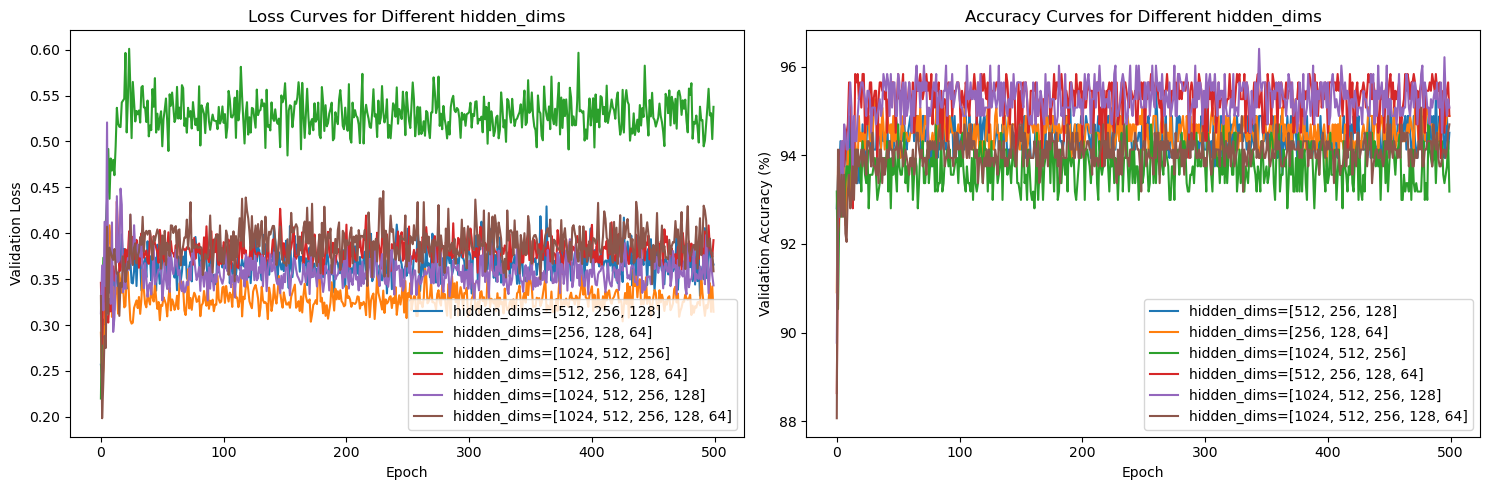

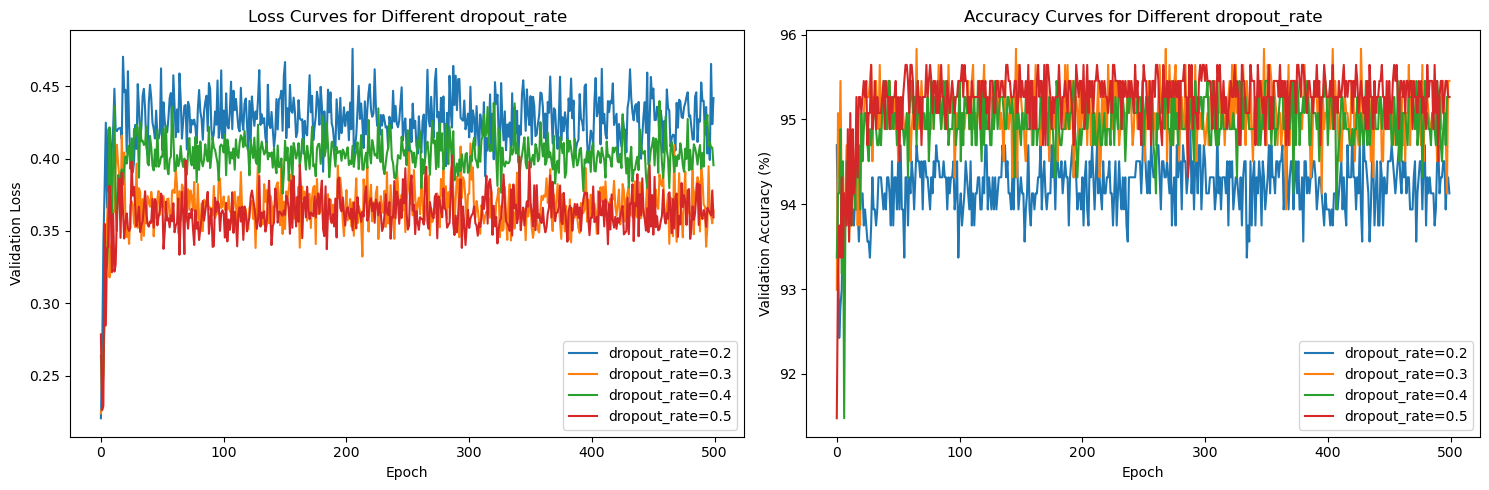

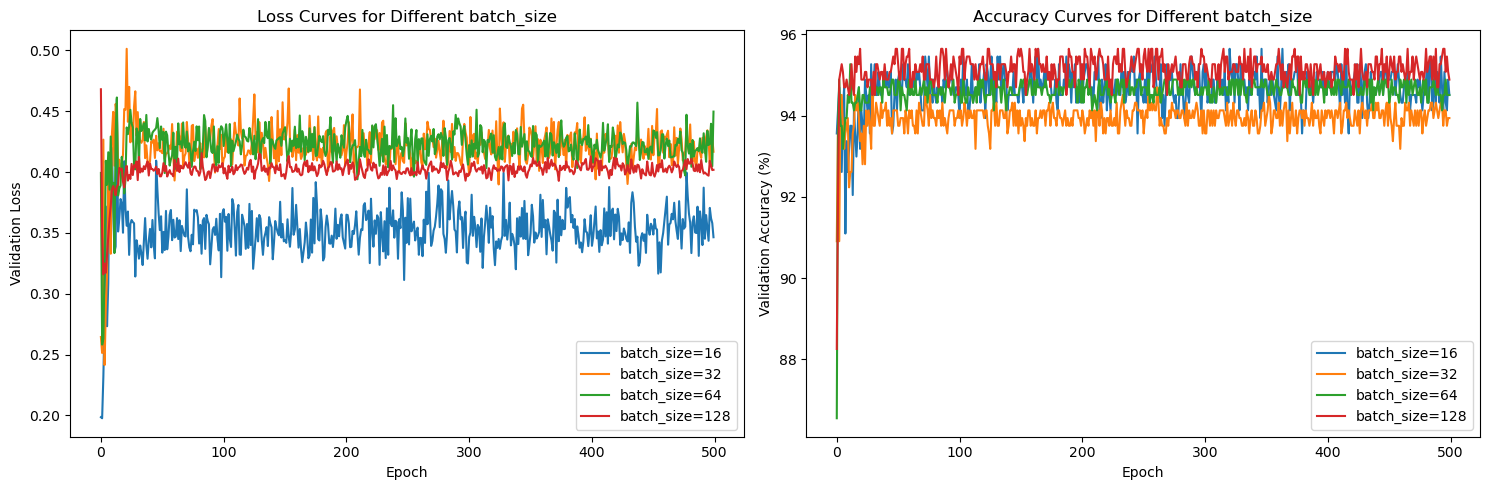

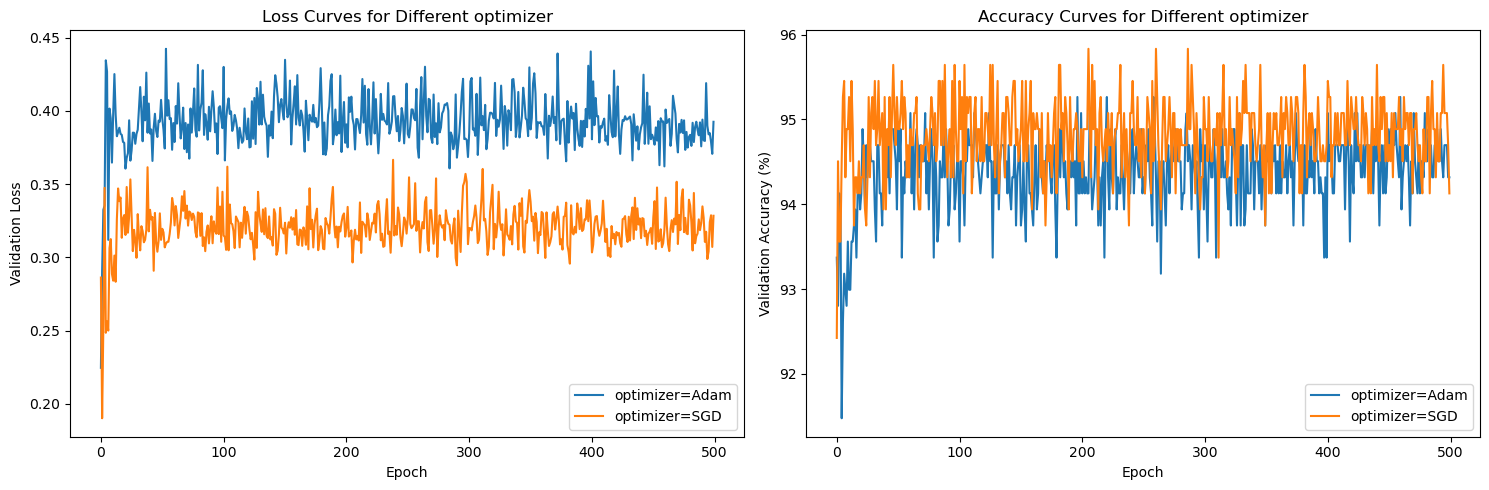

In [5]:
run_experiments()

以上在baseline的基础上分四个部分进行了超参数的修改，分别是：

### 1. 隐藏层的设置

- 对比了不同隐藏层设置
  ``` python
  hidden_dims_list = [
        [512, 256, 128],
        [256, 128, 64],
        [1024, 512, 256],
        [512, 256, 128, 64],
        [1024,512,256,128],
        [1024,512,256,128,64]
    ]
  ```
  从结果来看，基本在20次迭代之后已经收敛，如果采用了early stopping在20前几乎必然会停下。 但为了控制变量，baseline和后续的数值实验设定没有加入early stopping的正则化方法。

  在validation_loss上，最后一个隐藏层的大小设为64的训练效果比>64的要好，最终要实现的是8维度的分类，可能最后输出的特征尺度不需要特别大。三层隐藏层深度[256,128,64]在训练集上达到的loss最低，但在Validation set上的泛化效果却不如四层的[512,256,128,64],[1024,512,256,128]设置，可能是过拟合的原因。
### 2. dropout率
取dropout=[0.2,0.3,0.4,0.5]
从dropout的设置来看，dropout率为0.3和0.5的设置在training set上实现了最低的loss，同时在validation set上达到了最高的预测准确率。
### 3. batch_size
取batch_size=[16,32,64,128]
从batch_size的设置来看，取batch_size=16在training set上Loss最小，而且在validation set上预测准确率也较高。
而batch_size=128的较大的设定，虽然在训练集上loss略高于16,但也低于32,64,而且实现了较高的validation set的预测准确率
### 4. optimizer
更换了optimizer来看，SGD的性能似乎要优于Adam，loss更小而且预测准确率更高，但收敛速度似乎慢了一些。
